# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

## The Boston Housing Dataset

#### The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

#### •	CRIM - per capita crime rate by town
#### •	ZN - proportion of residential land zoned for lots over 25,000 sq. ft.
#### •	INDUS - proportion of non-retail business acres per town.
#### •	CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#### •	NOX - nitric oxides concentration (parts per 10 million)
#### •	RM - average number of rooms per dwelling
#### •	AGE - proportion of owner-occupied units built prior to 1940
#### •	DIS - weighted distances to five Boston employment centers
#### •	RAD - index of accessibility to radial highways
#### •	TAX - full-value property-tax rate per 10,000 USD
#### • PTRATIO - pupil-teacher ratio by town 
#### • BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### • LSTAT - % lower status of the population
#### • MEDV - Median value of owner-occupied homes in 1000's USD


# Importing training data

In [2]:
df_train=pd.read_csv("Boston_Train.csv")

# Data pre-processing

In [3]:
df_train

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6


In [4]:
#dropping the column which is not required
df_train.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
# checking the shape of data
df_train.shape

(351, 14)

In [6]:
# top 5 elements
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# bottom 5 elements
df_train.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9


In [8]:
# checking the data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  medv     351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


In [9]:
# checking the relation
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,351.0,0.401659,0.641716,0.00632,0.057845,0.13262,0.404865,4.0974
zn,351.0,15.327635,25.605040,0.00000,0.000000,0.00000,22.000000,100.0000
indus,351.0,8.435670,6.088947,0.46000,4.025000,6.20000,10.010000,25.6500
chas,351.0,0.076923,0.266850,0.00000,0.000000,0.00000,0.000000,1.0000
nox,351.0,0.510737,0.102256,0.38500,0.437450,0.49300,0.544000,0.8710
rm,351.0,6.403900,0.676424,4.90300,5.949500,6.26600,6.733000,8.7250
age,351.0,60.817949,28.393094,2.90000,36.150000,62.00000,88.450000,100.0000
dis,351.0,4.420862,1.968666,1.32160,2.768500,4.09520,5.871800,9.2229
rad,351.0,4.472934,1.615543,1.00000,4.000000,4.00000,5.000000,8.0000
tax,351.0,310.344729,67.577707,188.00000,264.000000,304.00000,358.000000,469.0000


In [10]:
# checking for null
df_train.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [11]:
# checking for duplicate
df_train.duplicated().sum()

0

# Importing the testing data

In [12]:
df_test=pd.read_csv("Boston_Test.csv")

# Data pre-processing

In [13]:
df_test

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
151,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
152,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
153,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [14]:
#dropping the column which is not required
df_test.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
# checking the shape of data
df_test.shape

(155, 14)

In [16]:
# top 5 elements
df_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [17]:
# bottom 5 elements
df_test.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
150,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
151,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
152,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
153,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
154,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [18]:
# checking the data type
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     155 non-null    float64
 1   zn       155 non-null    float64
 2   indus    155 non-null    float64
 3   chas     155 non-null    int64  
 4   nox      155 non-null    float64
 5   rm       155 non-null    float64
 6   age      155 non-null    float64
 7   dis      155 non-null    float64
 8   rad      155 non-null    int64  
 9   tax      155 non-null    int64  
 10  ptratio  155 non-null    float64
 11  black    155 non-null    float64
 12  lstat    155 non-null    float64
 13  medv     155 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 17.1 KB


In [19]:
# checking the relation
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,155.0,10.886843,12.842318,0.01709,4.385535,7.83932,13.4410,88.9762
zn,155.0,2.387097,13.294070,0.00000,0.000000,0.00000,0.0000,90.0000
indus,155.0,17.253484,3.973223,1.69000,18.100000,18.10000,18.1000,27.7400
chas,155.0,0.051613,0.221961,0.00000,0.000000,0.00000,0.0000,1.0000
nox,155.0,0.654239,0.076748,0.41000,0.591000,0.67900,0.7130,0.7700
rm,155.0,6.014555,0.687848,3.56100,5.695000,6.11200,6.4140,8.7800
age,155.0,86.140645,17.844278,18.50000,81.900000,92.60000,98.2500,100.0000
dis,155.0,2.377864,1.678612,1.12960,1.643250,2.00480,2.5016,12.1265
rad,155.0,21.045161,7.137192,1.00000,24.000000,24.00000,24.0000,24.0000
tax,155.0,629.916129,107.071159,187.00000,666.000000,666.00000,666.0000,711.0000


In [20]:
# checking for null
df_test.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [21]:
# checking for duplicate
df_test.duplicated().sum()

0

# EDA on training data

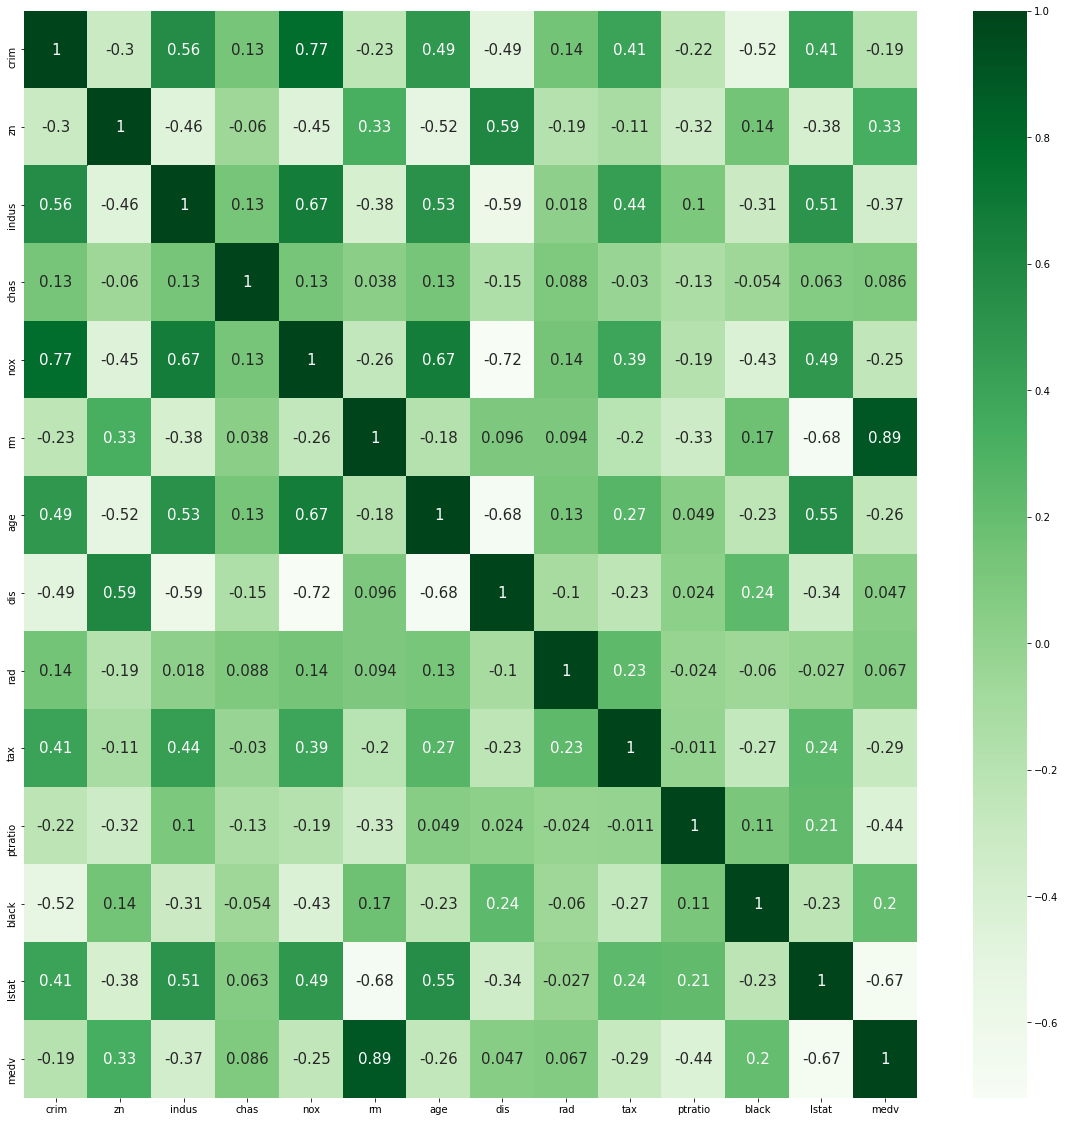

In [22]:
# heatmap to find the correlation between variables
plt.figure(figsize=(20,20))
sns.heatmap(data = df_train.corr(),annot=True,annot_kws={'size':15}, cmap='Greens')
plt.show()

# Key Correlation Takeaways

## 1.Negative correlation between LSTAT and MEDV i.e. more the number of people in lower status, lower is the median value of the home
## 2.Positive correlation between NOX and INDUS i.e. nitric oxide concentration increases with the proportion of non-retail activity
## 3.Strong positive correlation between TAX and RAD i.e. towns with higher highway connectivity demand higher taxation from the property
## 4.Positive correlation between RM and MEDV i.e. average number of rooms and median house value

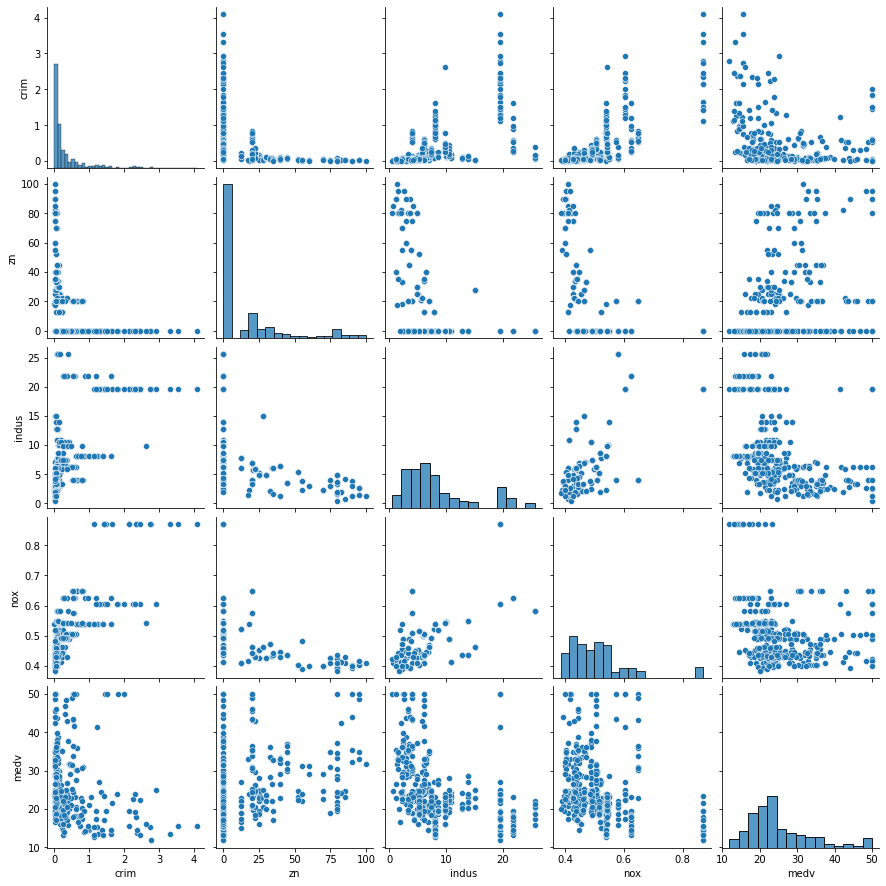

In [23]:
# a series of plots with few variables
# chas variable is not taken because it has discrete values like 0 and 1
sns.pairplot(df_train[['crim', 'zn', 'indus', 'nox', 'medv']])

### It is visible that as the crime rate(CRIM) increases the value of the house (MEDV) decreases.

### As NOX value increases the MEDV value decreases.

### The relation between NOX value and INDUS can also be seen.

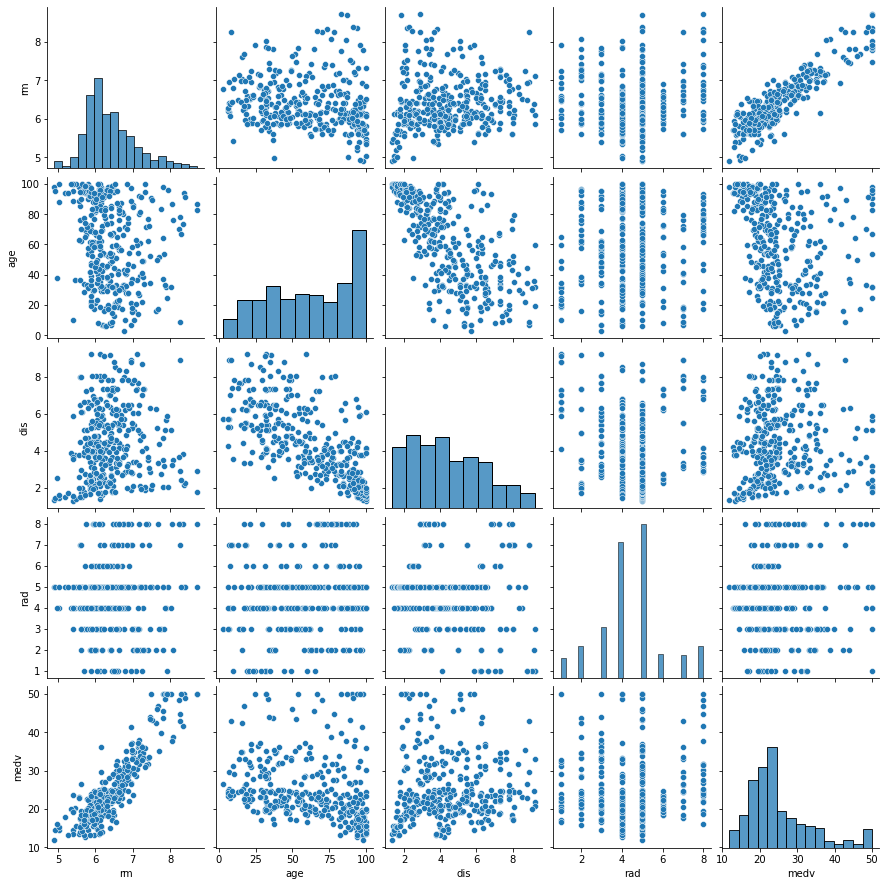

In [24]:
# a series of plots with few variables
sns.pairplot(df_train[['rm', 'age', 'dis', 'rad', 'medv',]])

### As no of rooms(RM) increases the value of the house(MEDV) increases

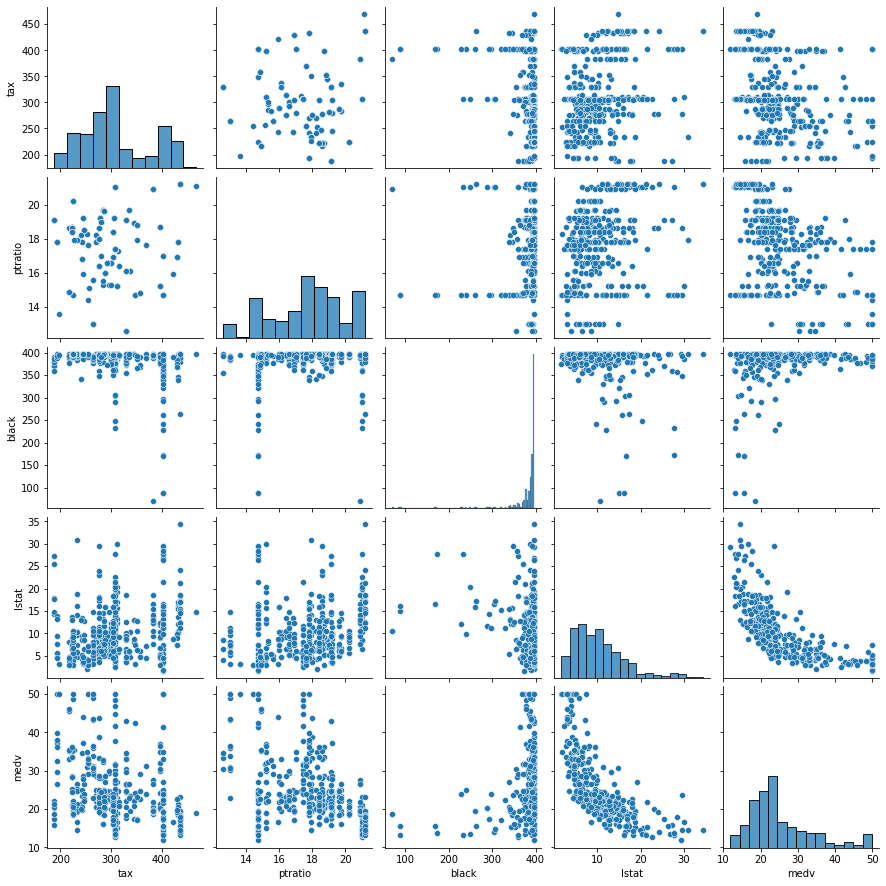

In [25]:
# a series of plots with few variables
sns.pairplot(df_train[['tax', 'ptratio', 'black', 'lstat', 'medv']])

### Relation between LSTAT and MEDV can be seen

# LSTAT Vs. MEDV

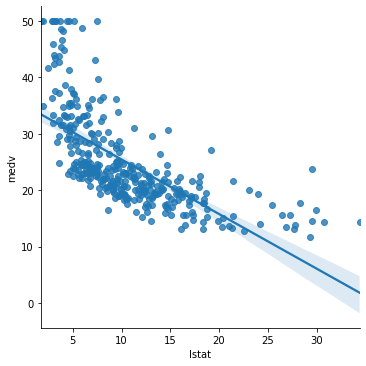

In [26]:
#Visualising simple regression output of LSTAT v/s MEDV (based on correlation inference)  
sns.lmplot(x='lstat',y='medv',data=df_train)

# RM Vs. MEDV

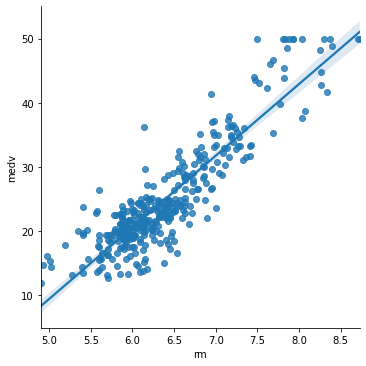

In [27]:
#Visualising simple regression output of RM v/s MEDV (based on correlation inference)  
sns.lmplot(x='rm',y='medv',data=df_train)

# Importing required libraries for predicting the MEDV

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Linear Regression

### First we will do with RM which has a positive corelation with MEDV according to heatmap

In [29]:
x_train = df_train[['rm']]
y_train = df_train[['medv']]
x_test = df_test[['rm']]
y_test = df_test[['medv']]

In [30]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(x_test)
l1 = lr.score(x_train, y_train)
l2 = lr.score(x_test, y_test)
l3 = r2_score(y_test, y_pred)
l4 = mean_absolute_error(y_test, y_pred)
l5 = mean_squared_error(y_test, y_pred)
l6 = np.sqrt(mean_squared_error(y_test, y_pred))
l = ["(RM) Linear Regression",l1,l2,l3,l4,l5,l6]

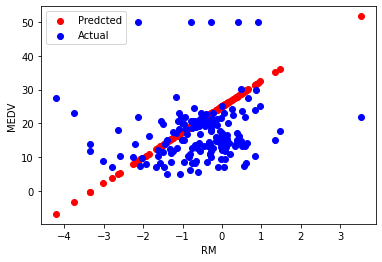

In [33]:
plt.scatter(x_test, y_pred, color = "r", label = "Predcted")
plt.scatter(x_test, y_test, color = 'b', label = "Actual")

plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend()
plt.show()

### Second we will do with LSTAT which has a negative corelation with MEDV according to heatmap

In [34]:
x_train = df_train[['lstat']]
y_train = df_train[['medv']]
x_test = df_test[['lstat']]
y_test = df_test[['medv']]

In [35]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(x_test)
k1 = lr.score(x_train, y_train)
k2 = lr.score(x_test, y_test)
k3 = r2_score(y_test, y_pred)
k4 = mean_absolute_error(y_test, y_pred)
k5 = mean_squared_error(y_test, y_pred)
k6 = np.sqrt(mean_squared_error(y_test, y_pred))
k = ["(LSTAT) Linear Regression",k1,k2,k3,k4,k5,k6]

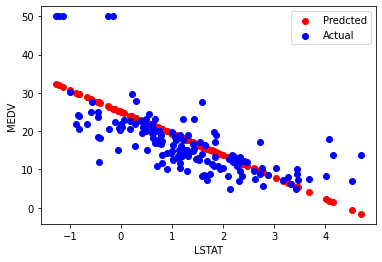

In [38]:
plt.scatter(x_test, y_pred, color = "r", label = "Predcted")
plt.scatter(x_test, y_test, color = 'b', label = "Actual")

plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()
plt.show()

# Polynomial Regression

In [39]:
poly = PolynomialFeatures(2)

### First we will do with RM which has a positive corelation with MEDV according to heatmap

In [40]:
x_train = df_train[['rm']]
y_train = df_train[['medv']]
x_test = df_test[['rm']]
y_test = df_test[['medv']]

In [41]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
poly_X_train = poly.fit_transform(x_train)
poly_X_test = poly.fit_transform(x_test)

In [43]:
poly_reg = LinearRegression()

In [44]:
poly_reg.fit(poly_X_train, y_train)

LinearRegression()

In [45]:
y_pred = poly_reg.predict(poly_X_test)
p1 = lr.score(x_train, y_train)
p2 = lr.score(x_test, y_test)
p3 = r2_score(y_test, y_pred)
p4 = mean_absolute_error(y_test, y_pred)
p5 = mean_squared_error(y_test, y_pred)
p6 = np.sqrt(mean_squared_error(y_test, y_pred))
p = ["(RM) Polynomial Regression",p1,p2,p3,p4,p5,p6]

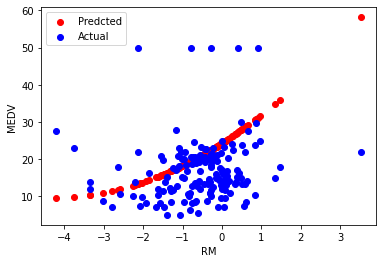

In [46]:
plt.scatter(x_test, y_pred, color = "r", label = "Predcted")
plt.scatter(x_test, y_test, color = 'b', label = "Actual")

plt.xlabel("RM")
plt.ylabel("MEDV")
plt.legend()
plt.show()

### Second we will do with LSTAT which has a negative corelation with MEDV according to heatmap

In [47]:
x_train = df_train[['lstat']]
y_train = df_train[['medv']]
x_test = df_test[['lstat']]
y_test = df_test[['medv']]

In [48]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [49]:
poly_X_train = poly.fit_transform(x_train)
poly_X_test = poly.fit_transform(x_test)

In [50]:
poly_reg = LinearRegression()

In [51]:
poly_reg.fit(poly_X_train, y_train)

LinearRegression()

In [52]:
y_pred = poly_reg.predict(poly_X_test)
j1 = lr.score(x_train, y_train)
j2 = lr.score(x_test, y_test)
j3 = r2_score(y_test, y_pred)
j4 = mean_absolute_error(y_test, y_pred)
j5 = mean_squared_error(y_test, y_pred)
j6 = np.sqrt(mean_squared_error(y_test, y_pred))
j = ["(LSTAT) Polynomial Regression",j1,j2,j3,j4,j5,j6]

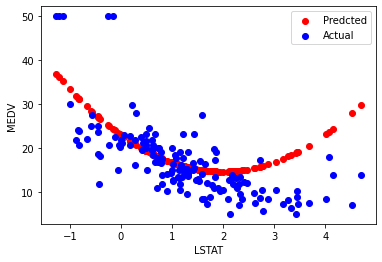

In [53]:
plt.scatter(x_test, y_pred, color = "r", label = "Predcted")
plt.scatter(x_test, y_test, color = 'b', label = "Actual")

plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()
plt.show()

# Multiple Linear Regression

### To get best positive result will take variables with positive co-relation and negative co-relation seperately

#### Positive Co-relation Variables 

In [54]:
x_train = df_train[['rm','zn','black','dis','rad','chas']]
y_train = df_train[['medv']]
x_test = df_test[['rm','zn','black','dis','rad','chas']]
y_test = df_test[['medv']]

In [55]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = lr.predict(x_test)
m1 = lr.score(x_train, y_train)
m2 = lr.score(x_test, y_test)
m3 = r2_score(y_test, y_pred)
m4 = mean_absolute_error(y_test, y_pred)
m5 = mean_squared_error(y_test, y_pred)
m6 = np.sqrt(mean_squared_error(y_test, y_pred))
m = ["Positive Multiple LR",m1,m2,m3,m4,m5,m6]

#### Negative Co-relation Variables 

In [58]:
x_train = df_train[['crim','indus','nox','age','tax','ptratio','lstat']]
y_train = df_train[['medv']]
x_test = df_test[['crim','indus','nox','age','tax','ptratio','lstat']]
y_test = df_test[['medv']]

In [59]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(x_test)
n1 = lr.score(x_train, y_train)
n2 = lr.score(x_test, y_test)
n3 = r2_score(y_test, y_pred)
n4 = mean_absolute_error(y_test, y_pred)
n5 = mean_squared_error(y_test, y_pred)
n6 = np.sqrt(mean_squared_error(y_test, y_pred))
n = ["Negative Multiple LR",n1,n2,n3,n4,n5,n6]

# Comparison between all models

In [62]:
df = pd.DataFrame(columns = ['model','train_score','test_score','r2_score','mean_absolute_error',
                             'mean_squared_error','root_mean_squared_error'])

In [63]:
df.loc[len(df)] = l
df.loc[len(df)] = k
df.loc[len(df)] = p
df.loc[len(df)] = j
df.loc[len(df)] = m
df.loc[len(df)] = n

In [64]:
df

,model,train_score,test_score,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,(RM) Linear Regression,0.800733,-0.829390,-0.829390,8.372597,121.815856,11.037022
1,(LSTAT) Linear Regression,0.453173,0.434114,0.434114,4.366115,37.681324,6.138512
2,(RM) Polynomial Regression,-1.657947,-2.713191,-0.580716,7.781723,105.257098,10.259488
3,(LSTAT) Polynomial Regression,0.453173,0.434114,0.335615,4.802494,44.240229,6.651333
4,Positive Multiple LR,0.816133,-0.556469,-0.556469,7.550397,103.642540,10.180498
5,Negative Multiple LR,0.589635,-0.281268,-0.281268,6.464557,85.317380,9.236741


### Here we can see that LSTAT variable gives us a positive r2 score in both linear and regression model and rest all other model has a negative r2 score so we can say that they all are not right fit for the prediction of MEDV